In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_data_generated, y_data_generated = make_classification(scale=1, random_state=1)

In [3]:
x_data_generated

array([[ 0.6065484 ,  0.81695766,  1.05132077, ..., -0.36453805,
         0.16466507, -0.76780375],
       [-3.05376438,  0.92116205, -1.45832446, ...,  0.20437739,
        -1.55269878, -0.4466992 ],
       [ 0.60640394,  0.68064537,  1.02124813, ...,  1.03703898,
        -0.83001099, -0.03599018],
       ...,
       [-2.30803851, -1.42368943,  1.14256392, ..., -0.24701649,
        -0.37911961,  0.27610275],
       [-1.53702887,  2.14957042,  0.32455352, ...,  2.15323347,
         1.31972591, -0.8797298 ],
       [ 0.37167029, -0.95543218, -0.1484898 , ..., -0.6294416 ,
         0.14225137,  0.78002714]])

### Базовая модель (все признаки)

In [4]:
def base_accuracy(X, y):
    acc = cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()
    print("Accuracy", '{:.3f}'.format(acc))
    return '{:.3f}'.format(acc)

In [5]:
acc_base = base_accuracy(x_data_generated, y_data_generated)

Accuracy 0.900


In [6]:
x_data_generated.shape

(100, 20)

In [7]:
data = pd.DataFrame(x_data_generated)

In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.053146,-0.062764,0.049450,0.210483,-0.097248,-0.060262,-0.020388,0.069076,-0.081307,0.035957,-0.147344,0.035219,0.270500,-0.052416,-0.013490,0.027092,0.016877,0.197783,-0.042690,-0.018577
std,1.302176,1.038809,1.152357,0.882755,0.981015,0.899996,0.953384,1.041781,0.990974,0.975737,1.078086,0.998601,1.029257,1.144764,1.083844,0.952015,0.986475,0.946056,1.007092,0.966921
min,-3.053764,-1.661536,-3.016032,-2.498213,-2.170711,-1.579213,-2.329041,-1.943922,-3.153357,-2.432509,-2.621012,-2.664126,-2.782534,-1.789624,-1.516493,-2.114164,-2.698362,-2.790996,-2.413503,-2.277298
25%,-0.830123,-0.970367,-0.500002,-0.481707,-0.702697,-0.746767,-0.523534,-0.705259,-0.682741,-0.714963,-0.734276,-0.543341,-0.443965,-1.069289,-1.138619,-0.625095,-0.535619,-0.430454,-0.835493,-0.778065
50%,0.025615,-0.426978,0.058174,0.225870,-0.149893,-0.202700,-0.004652,0.035744,-0.202844,-0.009490,-0.198935,0.295415,0.283328,-0.164593,-0.059412,-0.017485,0.058379,0.159954,0.006890,-0.099446
75%,0.976896,0.880810,0.841262,0.708763,0.593022,0.764931,0.609387,0.740141,0.482435,0.737476,0.485574,0.647263,0.940234,0.905881,0.864019,0.735543,0.541073,0.852596,0.737797,0.676636
max,3.321079,2.149570,3.432663,2.137828,2.230274,2.257082,2.505980,3.030857,2.428877,2.424307,2.917309,2.113824,2.827300,3.174625,2.783862,2.029997,2.711950,3.958603,2.390146,2.215843


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
dtypes: float64(20)
memory usage: 15.8 KB


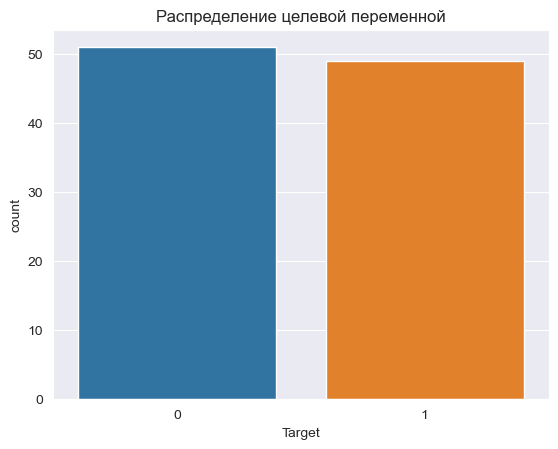

In [10]:
data['Target'] = y_data_generated
sns.countplot(x='Target', data=data)
plt.title('Распределение целевой переменной')
plt.show()

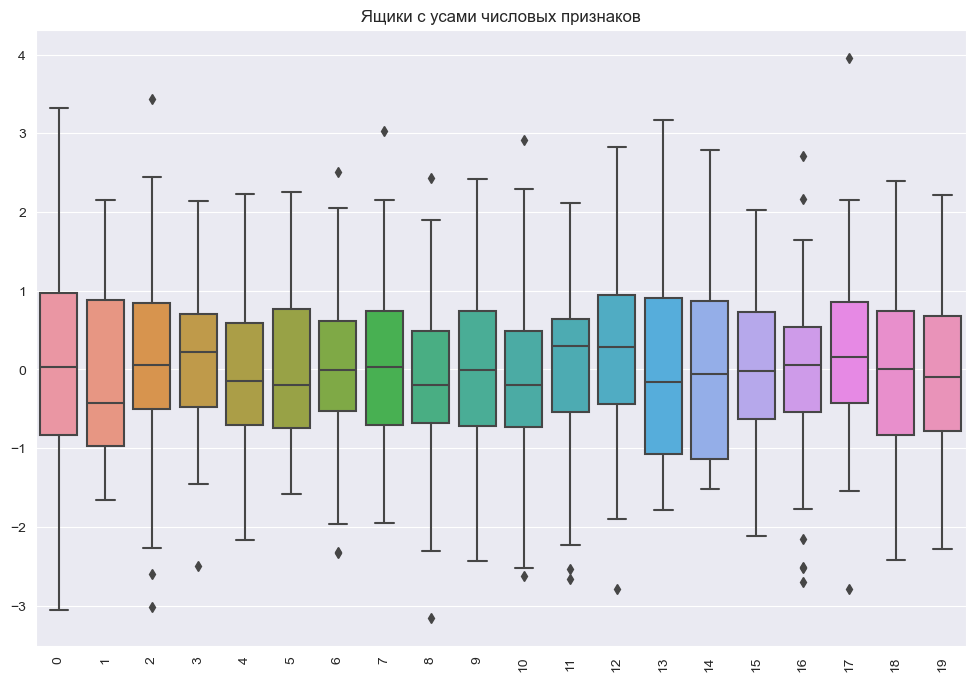

In [11]:
# Гистограммы числовых признаков
df_numeric = data.drop(columns=['Target'])
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numeric)
plt.title('Ящики с усами числовых признаков')
plt.xticks(rotation=90)
plt.show()

In [12]:
# sns.pairplot(df_numeric)
# plt.suptitle('Pairplot числовых признаков')
# plt.show()

## Cтатистические методы для отбора признаков

In [13]:
df = pd.DataFrame(x_data_generated, columns=[f'Feature_{i}' for i in range(x_data_generated.shape[1])])

### Отбор признаков на основе корреляции

<AxesSubplot:>

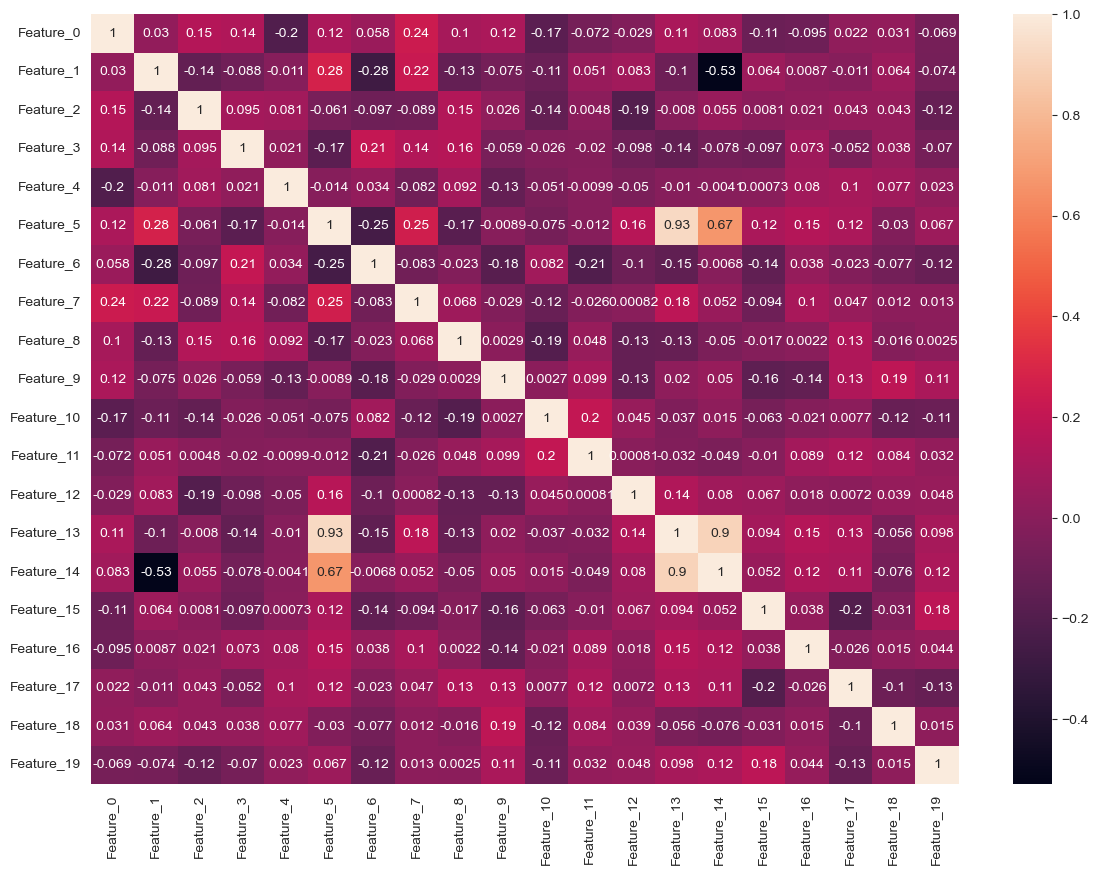

In [14]:
confusion_matrix = df.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(confusion_matrix, annot=True)

In [15]:
correlation_matrix = df.corr().abs()

In [16]:
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

In [17]:
correlation_matrix * mask

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
Feature_0,0.0,0.030162,0.150029,0.138957,0.204391,0.120476,0.058156,0.237076,0.100126,0.120547,0.166646,0.071916,0.028600,0.112907,0.083033,0.107159,0.095120,0.022236,0.031128,0.069105
Feature_1,0.0,0.000000,0.140666,0.087554,0.010522,0.275019,0.275946,0.224656,0.132413,0.074814,0.106019,0.050674,0.082805,0.104083,0.529278,0.063828,0.008718,0.011434,0.063847,0.074053
Feature_2,0.0,0.000000,0.000000,0.094761,0.080549,0.060541,0.096811,0.089392,0.145192,0.025647,0.135862,0.004778,0.194623,0.007968,0.055165,0.008084,0.020577,0.042561,0.043186,0.123259
Feature_3,0.0,0.000000,0.000000,0.000000,0.020610,0.165528,0.210063,0.140538,0.156724,0.059420,0.026073,0.020209,0.097687,0.137211,0.078485,0.096902,0.072774,0.051741,0.038233,0.070397
Feature_4,0.0,0.000000,0.000000,0.000000,0.000000,0.013886,0.033982,0.082204,0.091635,0.134081,0.051183,0.009858,0.050107,0.010276,0.004131,0.000735,0.080408,0.100560,0.077165,0.022802
Feature_5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.249098,0.254910,0.171948,0.008861,0.075201,0.011691,0.162775,0.927592,0.670169,0.115277,0.147102,0.117327,0.030019,0.067394
Feature_6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083141,0.023242,0.178269,0.081873,0.206022,0.104419,0.150455,0.006800,0.141998,0.038414,0.023327,0.077386,0.117563
Feature_7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068136,0.029027,0.121487,0.025967,0.000819,0.176398,0.051523,0.094297,0.104389,0.046946,0.011776,0.012679
Feature_8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002935,0.193072,0.048196,0.132743,0.126420,0.049520,0.016693,0.002162,0.133734,0.016078,0.002500
Feature_9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002723,0.098557,0.131390,0.019904,0.049935,0.157107,0.137124,0.133649,0.185885,0.113013


In [18]:
mask = ((correlation_matrix > 0.9) | (correlation_matrix < -0.9)) & (correlation_matrix != 1)

# Создаем список признаков, которые нужно удалить
to_drop = set()
for col in mask.columns:
    if mask.index[mask[col]].tolist():
        to_drop.add(col)

df_filtered = df.drop(columns=to_drop)
print("Удаленные признаки:", to_drop)

Удаленные признаки: {'Feature_5', 'Feature_13'}


In [19]:
df_filtered

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,0.606548,0.816958,1.051321,1.657125,-0.459718,0.650323,0.050317,1.705484,1.417674,-0.737290,0.309817,0.778174,-1.283933,0.080751,0.094996,-0.364538,0.164665,-0.767804
1,-3.053764,0.921162,-1.458324,0.240506,0.612233,-0.192004,0.398598,0.744885,-0.999427,0.479852,-0.961264,0.578464,-1.287740,-1.494194,0.494342,0.204377,-1.552699,-0.446699
2,0.606404,0.680645,1.021248,1.495885,0.672620,-1.470237,0.599213,2.428877,0.675454,2.293718,-0.214654,-1.019520,-1.285590,-0.477124,0.524750,1.037039,-0.830011,-0.035990
3,1.616950,-1.515948,2.449369,0.623362,0.242669,0.129102,1.407540,0.201830,-0.434957,0.502741,-1.219744,0.109403,0.676609,-0.198838,-0.545774,-0.203394,1.558806,-0.700399
4,-0.828148,-1.569173,1.762609,-1.223880,1.127751,-0.447308,-0.982161,0.050293,0.558264,-0.110728,0.680979,-0.474590,0.284574,0.522655,-0.357514,0.098942,-0.429386,-0.355413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.017818,0.752217,0.112368,-1.067877,0.394428,0.457947,0.572963,0.725523,-0.076679,-0.600139,-0.036818,0.571805,-1.226844,0.915499,-0.150504,0.185536,0.146765,-0.438200
96,1.829906,0.709932,0.759494,0.590494,-0.449346,-1.136433,-0.952084,1.085251,1.077377,-1.425156,-1.102970,0.439127,0.231198,-1.089551,-1.103216,0.834283,0.715333,-1.389550
97,-2.308039,-1.423689,1.142564,0.459782,-0.120889,0.428659,0.021172,-0.260561,-0.206331,0.327068,-0.691269,1.797919,0.970792,0.814625,-2.514925,-0.247016,-0.379120,0.276103
98,-1.537029,2.149570,0.324554,-0.349094,0.988578,0.121255,-0.889331,-0.242826,0.239045,0.503906,2.113824,0.913951,-1.239471,0.514865,0.505363,2.153233,1.319726,-0.879730


In [20]:
acc_corr = base_accuracy(df_filtered, y_data_generated)

Accuracy 0.900


Отбор низковариативных признаков
VarianceThreshold - это простой базовый подход к выбору функций. Он удаляет все функции, дисперсия которых не соответствует некоторому порогу. По умолчанию он удаляет все признаки с нулевой дисперсией, то есть признаки, которые имеют одинаковое значение во всех выборках.

### Отбор низковариативных признаков (VarianceThreshold)

In [21]:
from sklearn.feature_selection import VarianceThreshold

threshold = 1
selector = VarianceThreshold(threshold=threshold)

In [22]:
x_data_variance_filtered = selector.fit_transform(x_data_generated)

In [23]:
acc_var = base_accuracy(x_data_variance_filtered, y_data_generated)

Accuracy 0.940


## Отбор признаков на основе дисперсионного анализа

### (SelectKBest)

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best_selector = SelectKBest(score_func=f_classif, k=5)
x_data_k_best = k_best_selector.fit_transform(x_data_generated, y_data_generated)

In [25]:
acc_k_best = base_accuracy(x_data_k_best, y_data_generated)

Accuracy 0.960


In [26]:
?SelectKBest

## Отбор признаков с использованием моделей:

### Отбор признаков с использованием логистической регрессии (L1 регуляризация)

In [27]:
from sklearn.feature_selection import SelectFromModel

l1_selector = SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"))

In [28]:
x_data_l1_filtered = l1_selector.fit_transform(x_data_generated, y_data_generated)

In [29]:
acc_l1 = base_accuracy(x_data_l1_filtered, y_data_generated)

Accuracy 0.950


In [30]:
x_data_l1_filtered

array([[ 6.06548400e-01,  8.16957655e-01,  5.03170861e-02,
         1.70548352e+00,  1.41767401e+00, -1.28393266e+00,
         9.49961101e-02,  1.64665066e-01],
       [-3.05376438e+00,  9.21162053e-01,  3.98598388e-01,
         7.44884536e-01, -9.99426501e-01, -1.28774027e+00,
         4.94341651e-01, -1.55269878e+00],
       [ 6.06403944e-01,  6.80645373e-01,  5.99213235e-01,
         2.42887697e+00,  6.75453809e-01, -1.28558980e+00,
         5.24750492e-01, -8.30010986e-01],
       [ 1.61694960e+00, -1.51594823e+00,  1.40754000e+00,
         2.01830179e-01, -4.34956683e-01,  6.76608507e-01,
        -5.45774168e-01,  1.55880554e+00],
       [-8.28147589e-01, -1.56917330e+00, -9.82160958e-01,
         5.02932390e-02,  5.58264219e-01,  2.84574144e-01,
        -3.57514214e-01, -4.29385973e-01],
       [-4.24492791e-01, -8.44756388e-01, -1.78791289e+00,
        -1.51045638e+00, -3.53409983e-01, -7.77279576e-01,
        -2.75846063e-01, -1.56573815e+00],
       [-5.82192438e-01, -7.909593

### Отбор признаков с помощью модели RandomForest и feature_importance

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_data_generated, y_data_generated)

RandomForestClassifier()

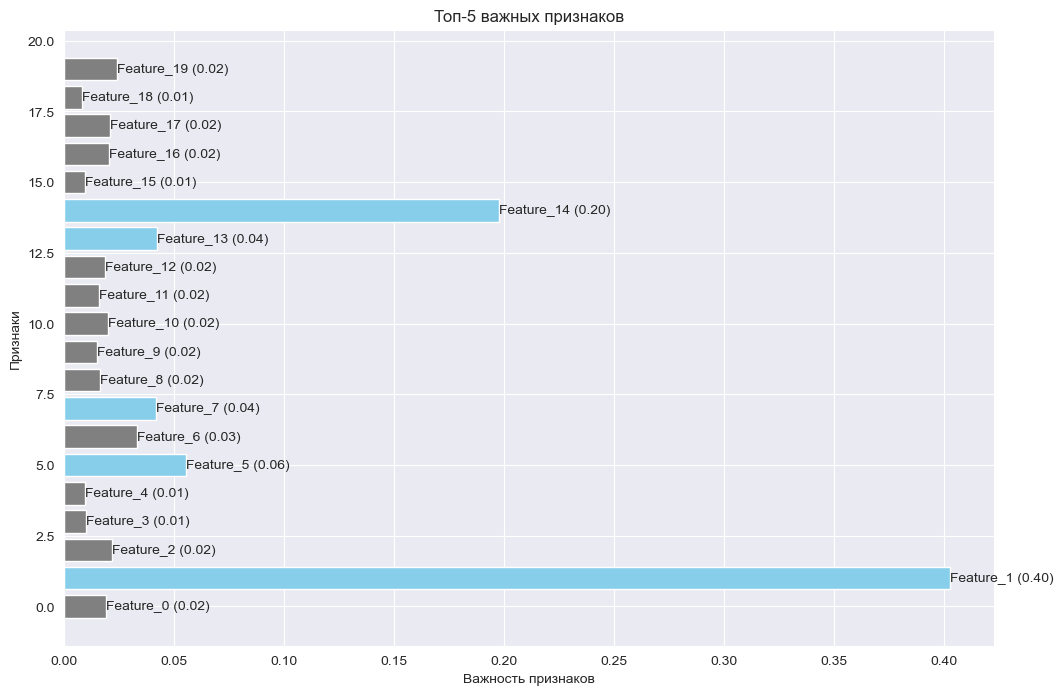

In [32]:
feature_importances = rf_classifier.feature_importances_
top_n = 5  
top_indices = feature_importances.argsort()[-top_n:][::-1] 

feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]
colors = ['skyblue' if i in top_indices else 'gray' for i in range(len(feature_importances))]
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(feature_importances)), feature_importances, color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{feature_names[i]} ({feature_importances[i]:.2f})', va='center')

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Топ-5 важных признаков')
plt.show()

In [33]:
importances = rf_classifier.feature_importances_
threshold = np.percentile(importances, 75)  # оставляем топ 25% важных признаков

In [34]:
mask = importances > threshold

In [35]:
x_data_rf_filtered1 = x_data_generated[:, mask]

In [36]:
acc_rf = base_accuracy(x_data_rf_filtered1, y_data_generated)

Accuracy 0.960


In [37]:
for i in range(0,100,10):
    threshold = np.percentile(importances, i)
    mask = importances > threshold
    x_data_rf_filtered = x_data_generated[:, mask]
    base_accuracy(x_data_rf_filtered, y_data_generated)

Accuracy 0.910
Accuracy 0.920
Accuracy 0.910
Accuracy 0.930
Accuracy 0.940
Accuracy 0.950
Accuracy 0.950
Accuracy 0.960
Accuracy 0.960
Accuracy 0.960


### Перебор признаков с использованием SequentialFeatureSelector

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
sfs = SequentialFeatureSelector(lr, k_features=5, cv=5)
sfs.fit(x_data_generated, y_data_generated)

selected_features = sfs.transform(x_data_generated)

acc_sfs = base_accuracy(selected_features, y_data_generated)

Accuracy 0.960


In [39]:
from tabulate import tabulate

accs = [
    ["Базовая модель (все признаки)", x_data_generated.shape[1], acc_base],
    ["Матрица корреляции", df_filtered.shape[1], acc_corr],
    ["VarianceThreshold", x_data_variance_filtered.shape[1], acc_var],
    ["Дисперсионный анализ (SelectKBest, f_classif)", x_data_k_best.shape[1], acc_k_best],
    ["Отбор с использованием моделей (LogisticRegression)", x_data_l1_filtered.shape[1], acc_l1],
    ["Отбор с использованием моделей (RandomForest)", x_data_rf_filtered1.shape[1], acc_rf],
    ["Перебор признаков (SequentialFeatureSelector)", selected_features.shape[1], acc_sfs]
]

df = pd.DataFrame(accs, columns=["Способ выбора признаков", "Количество признаков", "Средняя точность модели"])
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+-----------------------------------------------------+----------------------+-------------------------+
|               Способ выбора признаков               | Количество признаков | Средняя точность модели |
+-----------------------------------------------------+----------------------+-------------------------+
|            Базовая модель (все признаки)            |          20          |          0.900          |
|                 Матрица корреляции                  |          18          |          0.900          |
|                  VarianceThreshold                  |          9           |          0.940          |
|    Дисперсионный анализ (SelectKBest, f_classif)    |          5           |          0.960          |
| Отбор с использованием моделей (LogisticRegression) |          8           |          0.950          |
|    Отбор с использованием моделей (RandomForest)    |          5           |          0.960          |
|    Перебор признаков (SequentialFeatureSelector)    |

<b> Таким образом, заметим, что если мы будем использовать статические методы для отбора признаков, такие как матрица корреляции или 'как нам захочется, потому что нам кажется, что это сработает' не всегда может дать хороший результат. Конечно, на реальном датасете можно обосновывать, почему данный признак более или менее важен, но на искусственных данных мы убедились в том, что методы для отбора признаков справляются со своей задачей хорошо. Это можно и увидеть на показателях оценки точности. Не всегда количество признаков повышает точность.  
 - Наилучшая средняя точность была достигнута с помощью методов отбора признаков, которые оставили только наиболее важные признаки (5 лучших) - это метод дисперсионного анализа и метод перебора признаков.  
- Отбор с использованием моделей также показал хорошие результаты, уменьшая размерность данных и улучшая среднюю точность.
- Метод матрицы корреляции и VarianceThreshold оставили меньше признаков, но не сильно повысили точность модели.
- Важно учитывать, что выбор метода отбора признаков зависит от конкретной задачи и данных, и не всегда необходимо снижать размерность признакового пространства </b>